In [1]:
import numpy as np
from matplotlib import pyplot as pl
from matplotlib.pyplot import scatter
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import scipy.optimize 
import seaborn as sns  # generate random data 
from matplotlib import gridspec
import pandas as pd
from shapely.geometry import Polygon
from pandas import read_hdf
import os 
import imageio
from scipy import integrate
import math
from os import listdir,makedirs,path

def objective(limit, target):     
    w = np.where(h>limit)     
    count = h[w]     
    return count.sum() - target 

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def e_z_distri(z):
    return (1.0/math.sqrt(omega_m*((1+z)**3)+ omega_k*((1+z)**2) + omega_lambda))
    e_z_int, e_z_int_err = integrate.quad(e_z_distri,0.,z)

def r_com_distri(z):   ## dc in Pancho paper                # We define comoving distance for flat universe in Mpc
    return (d_h*integrate.quad(e_z_distri,0.,z)[0])

def d_lum_distri(z):                   # We define luminosity distance for flat universe in Mpc
    return (r_com_distri(z)*(1+z))

c_light=299792.458   # in km/s
c_AA=299792458*1.0e10# in AA/s
alpha_IMF=1.35       # Salpeter IMF: Salpeter et al. 1955 ApJ 121: 161
h_erg = 6.63e-27     # Planck constant (erg.s)
h = 0.70             # dimensionless Hubble constant
H0 = 100.0 * h       # Hubble constant in Km/s/Mpc
d_h=c_light/H0   # Hubble distance in Mpc   (70 km/s / Mpc)

#cosmology
omega_m=0.30
omega_k=0.0
omega_lambda=0.70

pl.rc('xtick', labelsize=14) 
pl.rc('ytick', labelsize=14) 

In the following, there are test made using SNANA and the SALT B14 model.

In [2]:
contour1=0.50
contour2=0.95
contour3=0.98

sims=['ideal_zALL','DDF','WFD']

# TESTS

Starting sim ideal_zALL
4000 4000 1.0
4000 4000 1.0
4000 4000 1.0
1.60269
[0.059700273110168095, 0.10746049159662154, 0.740283386562442, 1.6942937508570164]
[0.20879210819375535, 0.5335798320487608, 2.9230895147005254, 10.598906055153483]
[0.4103976433326908, 0.5039971058464824, 2.051988216663454, 4.086696532553832]
Starting sim DDF
8953 13379 0.6691830480603932
286 402 0.7114427860696517
186 247 0.7530364372469636
1.6014100000000002
[0.013559847880559835, 0.04842802814435781, 0.5640896718162771, 1.0556147862625105]
[0.0336696872746559, 0.05050453091144797, 0.5555498400216408, 1.2962829600518524]
[0.015509032821521307, 0.046527098467385, 0.35670775492037987, 0.8529968052426324]
Starting sim WFD
7000 10001 0.6999300069993001
17970 31311 0.5739197087285618
9049 16119 0.5613871828277188
1.3294200000000003
[0.006329670329689037, 0.018593406593146095, 0.4205274725258763, 0.5087076923076922]
[0.007242840630843704, 0.022730191345875898, 0.3773211763193465, 0.5411711827404653]
[0.0058144971397

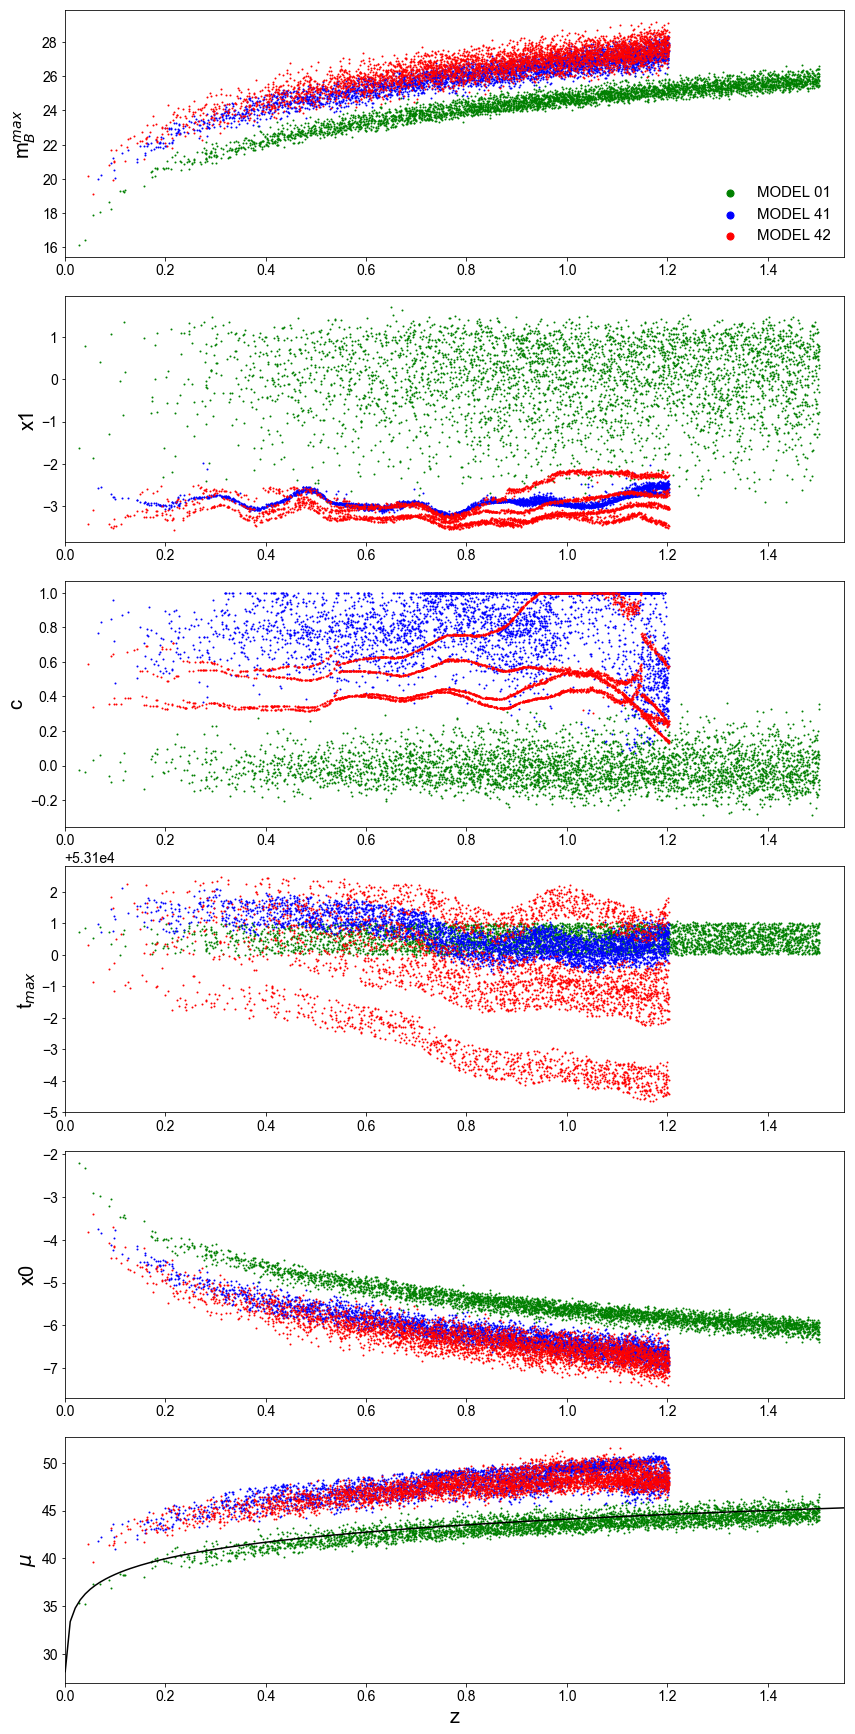

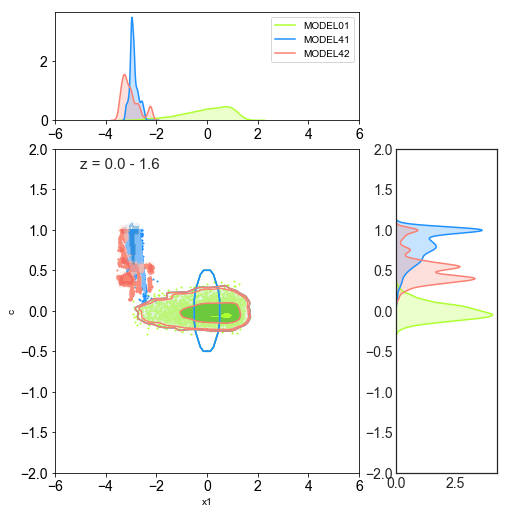

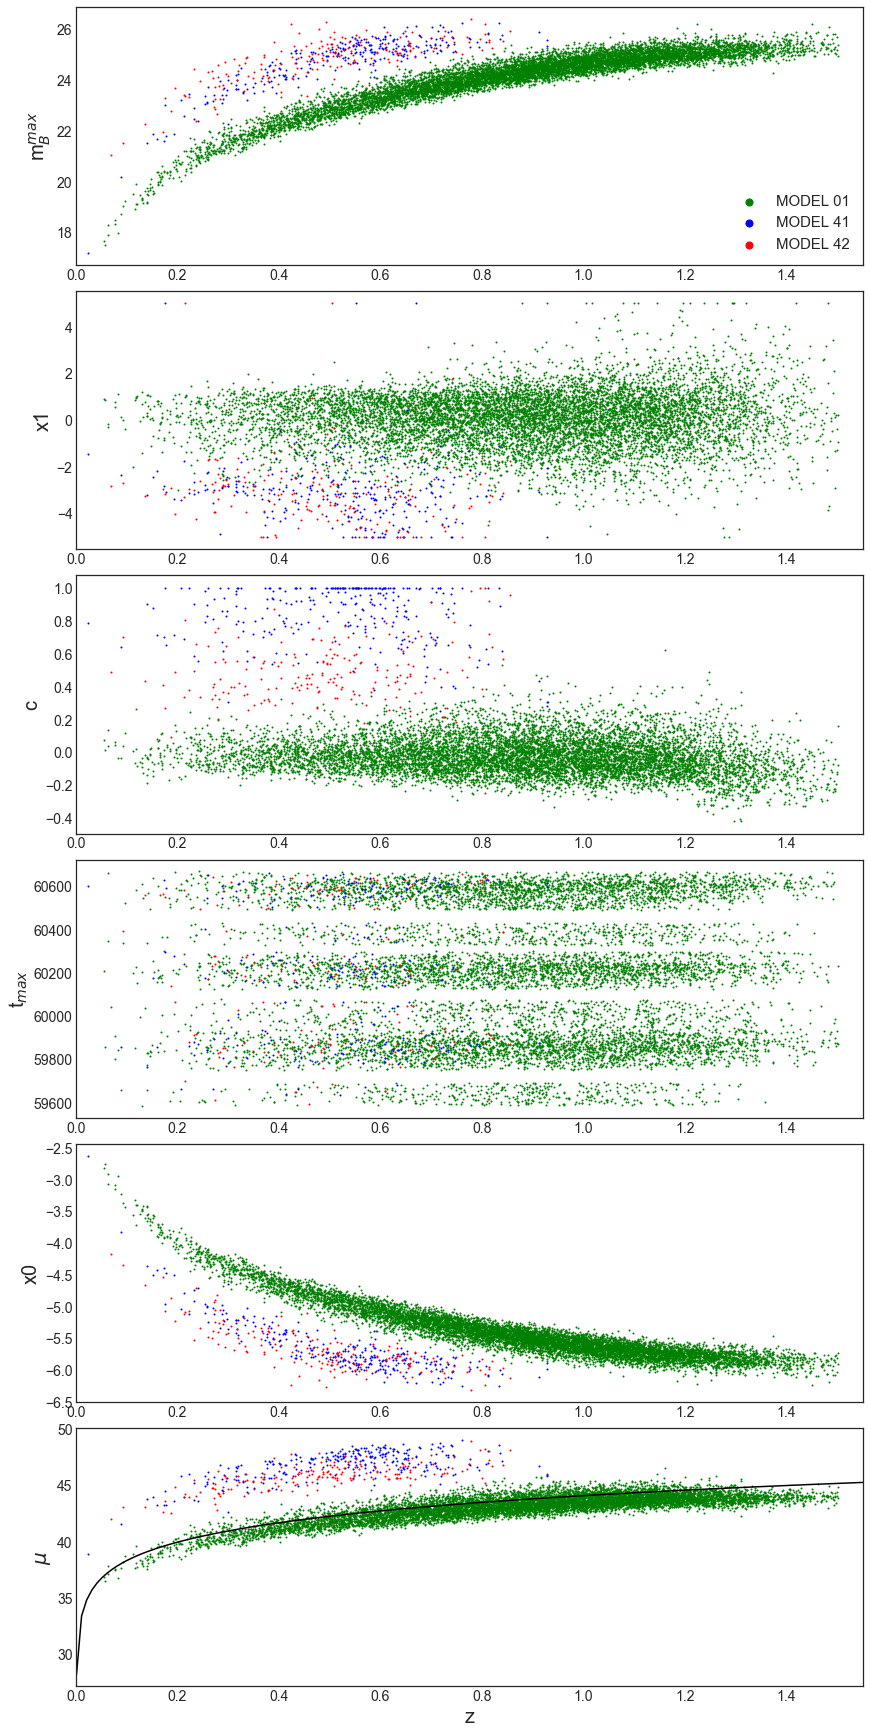

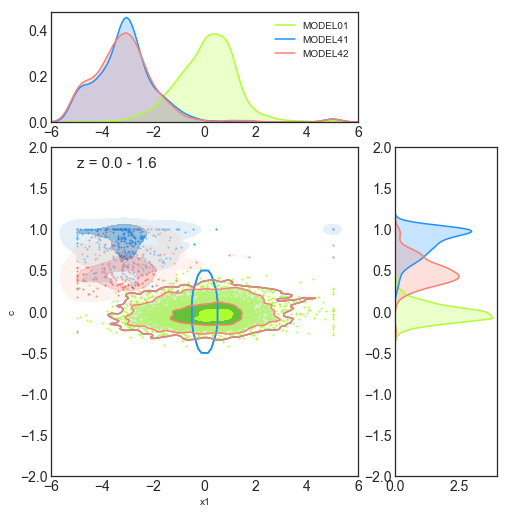

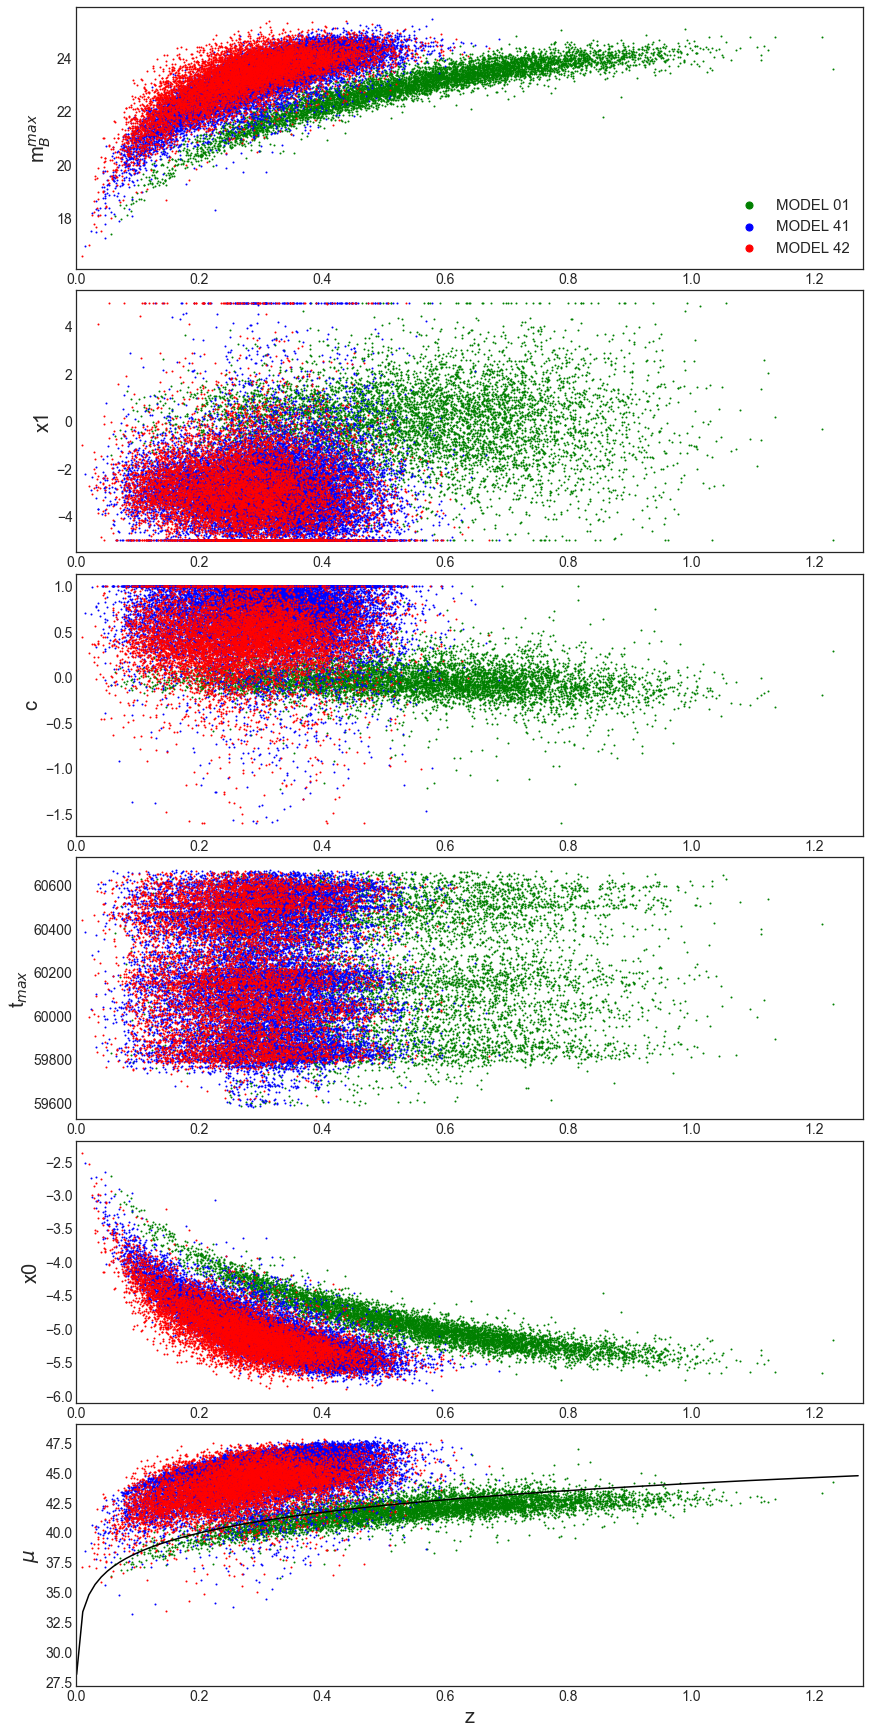

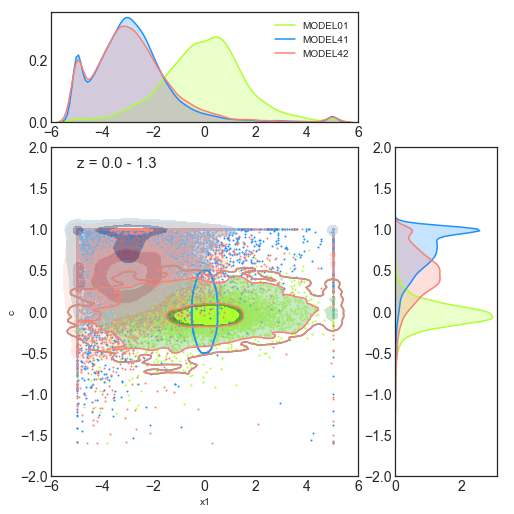

In [3]:
for i,sim in enumerate(sims):
    print('Starting sim '+sim)
    
    M01=pd.read_table('model01_'+sim+'.FITRES.TEXT',header=6,delim_whitespace=True)
    M41=pd.read_table('model41_'+sim+'.FITRES.TEXT',header=6,delim_whitespace=True)
    M42=pd.read_table('model42_'+sim+'.FITRES.TEXT',header=6,delim_whitespace=True)
    M01TOT=pd.read_table('model01_'+sim+'_z.txt',names='z')
    M41TOT=pd.read_table('model41_'+sim+'_z.txt',names='z')
    M42TOT=pd.read_table('model42_'+sim+'_z.txt',names='z')
            
    print(len(M01),len(M01TOT),len(M01)/len(M01TOT))
    print(len(M41),len(M41TOT),len(M41)/len(M41TOT))
    print(len(M42),len(M42TOT),len(M42)/len(M42TOT))
    if np.max(M01.zCMB) > np.max(M41.zCMB): 
        zmax=np.max(M01.zCMB)+0.05
    else:
        zmax=np.max(M41.zCMB)+0.05
    if np.max(M42.zCMB) > zmax: zmax=np.max(M42.zCMB)+0.05
    print(zmax+0.05)
    
    fig1, ax = pl.subplots(6,1,figsize=(12,24))#,sharex=True)
    
    pl.sca(ax[0])
    pl.scatter(100.,M01.mB[0],s=50,color='green',label='MODEL 01')
    pl.scatter(100.,M41.mB[0],s=50,color='blue',label='MODEL 41')
    pl.scatter(100.,M42.mB[0],s=50,color='red' ,label='MODEL 42')
    pl.scatter(M01.zCMB,M01.mB,s=1,color='green',label='_nolabel_')
    pl.scatter(M41.zCMB,M41.mB,s=1,color='blue',label='_nolabel_')
    pl.scatter(M42.zCMB,M42.mB,s=1,color='red' ,label='_nolabel_')
    pl.xlim(0.00,zmax)
    pl.ylabel(r'm$_B^{max}$',size=20)
    pl.legend(prop={'size':15},frameon=False,loc=4)
    
    pl.sca(ax[1])
    pl.scatter(M01.zCMB,M01.x1,s=1,color='green')
    pl.scatter(M41.zCMB,M41.x1,s=1,color='blue')
    pl.scatter(M42.zCMB,M42.x1,s=1,color='red')
    pl.xlim(0.00,zmax)
    pl.ylabel(r'x1',size=20)
    
    pl.sca(ax[2])
    pl.scatter(M01.zCMB,M01.c,s=1,color='green')
    pl.scatter(M41.zCMB,M41.c,s=1,color='blue')
    pl.scatter(M42.zCMB,M42.c,s=1,color='red')
    pl.xlim(0.00,zmax)
    pl.ylabel(r'c',size=20)
    
    pl.sca(ax[3])
    pl.scatter(M01.zCMB,M01.PKMJD,s=1,color='green')
    pl.scatter(M41.zCMB,M41.PKMJD,s=1,color='blue')
    pl.scatter(M42.zCMB,M42.PKMJD,s=1,color='red')
    pl.xlim(0.00,zmax)
    pl.ylabel(r't$_{max}$',size=20)
    
    pl.sca(ax[4])
    pl.scatter(M01.zCMB,np.log10(M01.x0),s=1,color='green')
    pl.scatter(M41.zCMB,np.log10(M41.x0),s=1,color='blue')
    pl.scatter(M42.zCMB,np.log10(M42.x0),s=1,color='red')
    pl.xlim(0.00,zmax)
    pl.ylabel(r'x0',size=20)
    
    pl.sca(ax[5])
    mu_M01=M01.mB+19.05-0.14*M01.x1+3.1*M01.c
    mu_M41=M41.mB+19.05-0.14*M41.x1+3.1*M41.c
    mu_M42=M42.mB+19.05-0.14*M42.x1+3.1*M42.c
    zz=np.arange(0.001,zmax,0.01)
    mucosmo=[]
    for i,zzz in enumerate(zz): 
        mucosmo.append(5*np.log10(d_lum_distri(zzz))+25)
    
    pl.plot(zz,mucosmo,color='black')
    pl.scatter(M01.zCMB,mu_M01,s=1,color='green')
    pl.scatter(M41.zCMB,mu_M41,s=1,color='blue')
    pl.scatter(M42.zCMB,mu_M42,s=1,color='red')
    pl.xlim(0.00,zmax)
    pl.xlabel('z',size=20)
    pl.ylabel(r'$\mu$',size=20)
    
    fig1.tight_layout(pad=0.4)
    fig1.savefig('figs/LCpars_'+sim+'.png',bbox_inches='tight', format='png')
    
    ##########################################################################################
    
    fig2, ax = pl.subplots(1,1,figsize=(10,10))#,sharey=True)

    pl.hist(M01TOT.z,alpha=0.25,color='greenyellow',bins=30)
    pl.hist(M01.zCMB,alpha=0.25,color='green',bins=30)
    pl.hist(M41TOT.z,alpha=0.25,color='steelblue',bins=30)
    pl.hist(M41.zCMB,alpha=0.25,color='blue',bins=30)
    pl.hist(M42TOT.z,alpha=0.25,color='orange',bins=30)
    pl.hist(M42.zCMB,alpha=0.25,color='red',bins=30)
    pl.xlim(0.0,zmax)
    #pl.ylim(0.0,5500)
    pl.scatter(100.,M01.mB[0],s=50,color='green',label='MODEL 01')
    pl.scatter(100.,M41.mB[0],s=50,color='blue',label='MODEL 41')
    pl.scatter(100.,M42.mB[0],s=50,color='red' ,label='MODEL 42')
    pl.legend(prop={'size':15},frameon=False,loc=1)
    pl.xlabel('z',size=20)
    pl.ylabel(r'# M41',size=20)

    fig2.tight_layout(pad=0.4)
    fig2.savefig('figs/zdist_'+sim+'.png',bbox_inches='tight', format='png')

    ##########################################################################################
    
    l=[M01.x1[(np.isfinite(M01.x1)) & (np.isfinite(M01.c))],M01.c[(np.isfinite(M01.x1)) & (np.isfinite(M01.c))]]
    m=[M41.x1[(np.isfinite(M41.x1)) & (np.isfinite(M41.c))],M41.c[(np.isfinite(M41.x1)) & (np.isfinite(M41.c))]]
    n=[M42.x1[(np.isfinite(M42.x1)) & (np.isfinite(M42.c))],M42.c[(np.isfinite(M42.x1)) & (np.isfinite(M42.c))]]
            
    h,xedges,yedges=np.histogram2d(l[0],l[1],bins=6,normed=True)  
    norm=h.sum()
    target1 = norm*contour1 
    target2 = norm*contour2 
    target3 = norm*contour3 
    level1= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target1,)) 
    level2= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target2,)) 
    level3= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target3,)) 
    level4=h.max() 
    levels0=[level3,level2,level1,level4*1.1]
 
    h,xedges,yedges=np.histogram2d(m[0],m[1],bins=6,normed=True)  
    norm=h.sum()
    target1 = norm*contour1 
    target2 = norm*contour2 
    target3 = norm*contour3 
    level1= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target1,)) 
    level2= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target2,)) 
    level3= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target3,)) 
    level4=h.max() 
    levels1=[level3,level2,level1,level4*1.1]
    
    h,xedges,yedges=np.histogram2d(n[0],n[1],bins=6,normed=True)  
    norm=h.sum()
    target1 = norm*contour1 
    target2 = norm*contour2 
    target3 = norm*contour3 
    level1= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target1,)) 
    level2= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target2,)) 
    level3= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target3,)) 
    level4=h.max() 
    levels2=[level3,level2,level1,level4*1.1]
    
    print(levels0)
    print(levels1)
    print(levels2)

    zz = sns.kdeplot(l[0],l[1], shade=True, n_levels=levels0)
    aa = sns.kdeplot(m[0],m[1], shade=True, n_levels=levels1)
    bb = sns.kdeplot(n[0],n[1], shade=True, n_levels=levels2)
    pl.close()

    on=[]
    for k in list(range(len(zz.collections[3].get_paths()))):
        on.append(len(zz.collections[3].get_paths()[k].vertices))
    bo=np.argmax(on)
    
    v03=zz.collections[3].get_paths()[bo].vertices
    x03 = v03[:,0]
    y03 = v03[:,1]
    hastaaqui=np.where((x03 == x03[0]) & (y03 == y03[0]))[0][1]
    y03=y03[0:hastaaqui+1]
    x03=x03[0:hastaaqui+1]
    v02=zz.collections[1].get_paths()[0].vertices
    x02 = v02[:,0]
    y02 = v02[:,1]
    hastaaqui=np.where((x02 == x02[0]) & (y02 == y02[0]))[0][1]
    y02=y02[0:hastaaqui+1]
    x02=x02[0:hastaaqui+1]
    v01=zz.collections[2].get_paths()[0].vertices
    x01 = v01[:,0]
    y01 = v01[:,1]
    hastaaqui=np.where((x01 == x01[0]) & (y01 == y01[0]))[0][1]
    y01=y01[0:hastaaqui+1]
    x01=x01[0:hastaaqui+1]
    
    on=[]
    for k in list(range(len(aa.collections[3].get_paths()))):
        on.append(len(aa.collections[3].get_paths()[k].vertices))
    bo=np.argmax(on)
    
    v13=aa.collections[3].get_paths()[bo].vertices
    x13 = v13[:,0]
    y13 = v13[:,1]
    hastaaqui=np.where((x13 == x13[0]) & (y13 == y13[0]))[0][1]
    y13=y13[0:hastaaqui+1]
    x13=x13[0:hastaaqui+1]
    v12=aa.collections[1].get_paths()[0].vertices
    x12 = v12[:,0]
    y12 = v12[:,1]
    hastaaqui=np.where((x12 == x12[0]) & (y12 == y12[0]))[0][1]
    y12=y12[0:hastaaqui+1]
    x12=x12[0:hastaaqui+1]
    v11=aa.collections[2].get_paths()[0].vertices
    x11 = v11[:,0]
    y11 = v11[:,1]
    hastaaqui=np.where((x11 == x11[0]) & (y11 == y11[0]))[0][1]
    y11=y11[0:hastaaqui+1]
    x11=x11[0:hastaaqui+1]
    
    on=[]
    for k in list(range(len(bb.collections[3].get_paths()))):
        on.append(len(bb.collections[3].get_paths()[k].vertices))
    bo=np.argmax(on)
          
    v23=bb.collections[3].get_paths()[bo].vertices
    x23 = v23[:,0]
    y23 = v23[:,1]
    hastaaqui=np.where((x23 == x23[0]) & (y23 == y23[0]))[0][1]
    y23=y23[0:hastaaqui+1]
    x23=x23[0:hastaaqui+1]
    v22=bb.collections[4].get_paths()[0].vertices
    x22 = v22[:,0]
    y22 = v22[:,1]
    hastaaqui=np.where((x22 == x22[0]) & (y22 == y22[0]))[0][1]
    y22=y22[0:hastaaqui+1]
    x22=x22[0:hastaaqui+1]
    v21=bb.collections[5].get_paths()[0].vertices
    x21 = v21[:,0]
    y21 = v21[:,1]
    hastaaqui=np.where((x21 == x21[0]) & (y21 == y21[0]))[0][1]
    y21=y21[0:hastaaqui+1]
    x21=x21[0:hastaaqui+1]
    
    fig3, ax = pl.subplots(1,1,figsize=(7,7))
    
    gs = gridspec.GridSpec(2, 2,width_ratios=[3, 1],height_ratios=[1, 3])
    ax1 = pl.subplot(gs[0])
    
    sns.kdeplot(l[0], shade=True,color='greenyellow',label='MODEL01')
    sns.kdeplot(m[0], shade=True,color='dodgerblue',label='MODEL41')
    sns.kdeplot(n[0], shade=True,color='salmon',label='MODEL42')
    pl.xlim(-6,6)
    
    ax2 = pl.subplot(gs[1])
    
    ax2.axis('off')
    #p1=Polygon(zip(x02,y02))
    #p1=Polygon(zip(x12,y12))
    #p2=Polygon(zip(x22,y22))
    #ax2.text(0,0.9,'Recall    = %.3f' %(p2.intersection(p1).area/PolyArea(x12,y12)))
    #ax2.text(0,0.7,'Precision = %.3f' %(p2.intersection(p1).area/PolyArea(x22,y22)))
    #ax2.text(0,0.5,'Cont.     = %.3f' %(1-p2.intersection(p1).area/PolyArea(x22,y22)))
    #ax2.text(0,0.3,'F1_score  = %.3f' %(2./(1/(p2.intersection(p1).area/PolyArea(x12,y12))+1/(p2.intersection(p1).area/PolyArea(x22,y22)))))
    #ax2.text(0,0.1,'Effic.    = %.3f' %(p2.intersection(p1).area/PolyArea(x12,y12)*p2.intersection(p1).area/PolyArea(x22,y22)))
    
    ax3 = pl.subplot(gs[2])
    
    sns.set_style("white")
    pl.scatter(l[0], l[1],color='greenyellow',s=1)
    pl.scatter(m[0], m[1],color='dodgerblue',s=1)
    pl.scatter(n[0], n[1],color='salmon',s=1)
    cc=sns.kdeplot(l[0],l[1], cmap='Greens', shade=True, shade_lowest=False,alpha=0.5, n_levels=levels0,ax=ax3)
    cc=sns.kdeplot(m[0],m[1], cmap='Blues', shade=True, shade_lowest=False,alpha=0.5, n_levels=levels1,ax=ax3)
    dd=sns.kdeplot(n[0],n[1], cmap='Reds' , shade=True, shade_lowest=False ,alpha=0.2, n_levels=levels2,ax=ax3)
    pl.xlim(-6,6)
    pl.ylim(-2,2)
    ax3.text(-5,1.75,'z = %.1f - %.1f' %(0.0,zmax), fontsize=15)
    
    pl.plot(x01,y01,color='greenyellow')
    pl.plot(x02,y02,color='greenyellow')
    pl.plot(x03,y03,color='greenyellow')

    pl.plot(x11,y11,color='dodgerblue')
    pl.plot(x12,y12,color='dodgerblue')
    pl.plot(x13,y13,color='dodgerblue')
    
    pl.plot(x21,y21,color='salmon')
    pl.plot(x22,y22,color='salmon')
    pl.plot(x23,y23,color='salmon')
    
    ax4 = pl.subplot(gs[3])
    
    cc=sns.kdeplot(l[1], shade=True, vertical=True,color='greenyellow',legend=False,ax=ax4)
    dd=sns.kdeplot(m[1], shade=True, vertical=True,color='dodgerblue',legend=False,ax=ax4)
    ee=sns.kdeplot(n[1], shade=True, vertical=True,color='salmon',legend=False,ax=ax4)
    pl.ylim(-2,2)
    
    fig3.tight_layout(pad=0.2)
    fig3.savefig('figs/eff_'+sim+'.png',bbox_inches='tight', format='png')

#    ##########################################################################################
#
#    lowlim=[0.0,0.3,0.6,0.9]
#    highlim=[0.3,0.6,0.9,1.2]
#    bbiinn=[3,5,5,5]
#    contour1=0.68
#    contour2=0.95 
#    contour3=0.98
#        
#    images = []
#        
#    for j in range(len(lowlim)):
#        
#        l=[M01.x1[(M01.zCMB > lowlim[j]) & (M01.zCMB < highlim[j])],M01.c[(M01.zCMB > lowlim[j]) & (M01.zCMB < highlim[j])]]
#        m=[M41.x1[(M41.zCMB > lowlim[j]) & (M41.zCMB < highlim[j])],M41.c[(M41.zCMB > lowlim[j]) & (M41.zCMB < highlim[j])]]
#        n=[M42.x1[(M42.zCMB > lowlim[j]) & (M42.zCMB < highlim[j])],M42.c[(M42.zCMB > lowlim[j]) & (M42.zCMB < highlim[j])]]
#        print(len(l[0]),len(m[0]),len(n[0]))
#                
#        h,xedges,yedges=np.histogram2d(l[0],l[1],bins=bbiinn[j],normed=True)  
#        norm=h.sum()
#        target1 = norm*contour1 
#        target2 = norm*contour2 
#        target3 = norm*contour3 
#        level1= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target1,)) 
#        level2= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target2,)) 
#        level3= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target3,)) 
#        level4=h.max() 
#        levels0=[level3,level2,level1,level4*1.1]
#    
#        h,xedges,yedges=np.histogram2d(m[0],m[1],bins=bbiinn[j],normed=True)  
#        norm=h.sum()
#        target1 = norm*contour1 
#        target2 = norm*contour2 
#        target3 = norm*contour3 
#        level1= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target1,)) 
#        level2= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target2,)) 
#        level3= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target3,)) 
#        level4=h.max() 
#        levels1=[level3,level2,level1,level4*1.1]
#    
#        h,xedges,yedges=np.histogram2d(n[0],n[1],bins=bbiinn[j],normed=True)  
#        norm=h.sum()
#        target1 = norm*contour1 
#        target2 = norm*contour2 
#        target3 = norm*contour3 
#        level1= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target1,)) 
#        level2= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target2,)) 
#        level3= scipy.optimize.bisect(objective, h.min(), h.max(), args=(target3,)) 
#        level4=h.max() 
#        levels2=[level3,level2,level1,level4*1.1]
#    
#        print(levels0)
#        print(levels1)
#        print(levels2)
#        
#        zz = sns.kdeplot(l[0],l[1], shade=True, n_levels=levels0)
#        aa = sns.kdeplot(m[0],m[1], shade=True, n_levels=levels1)
#        bb = sns.kdeplot(n[0],n[1], shade=True, n_levels=levels2)
#        pl.close()
#        
#        on=[]
#        for k in list(range(len(zz.collections[3].get_paths()))):
#            on.append(len(zz.collections[3].get_paths()[k].vertices))
#        bo=np.argmax(on)
#        
#        v03=zz.collections[3].get_paths()[bo].vertices
#        x03 = v03[:,0]
#        y03 = v03[:,1]
#        hastaaqui=np.where((x03 == x03[0]) & (y03 == y03[0]))[0][1]
#        y03=y03[0:hastaaqui+1]
#        x03=x03[0:hastaaqui+1]
#        v02=zz.collections[1].get_paths()[0].vertices
#        x02 = v02[:,0]
#        y02 = v02[:,1]
#        hastaaqui=np.where((x02 == x02[0]) & (y02 == y02[0]))[0][1]
#        y02=y02[0:hastaaqui+1]
#        x02=x02[0:hastaaqui+1]
#        v01=zz.collections[2].get_paths()[0].vertices
#        x01 = v01[:,0]
#        y01 = v01[:,1]
#        hastaaqui=np.where((x01 == x01[0]) & (y01 == y01[0]))[0][1]
#        y01=y01[0:hastaaqui+1]
#        x01=x01[0:hastaaqui+1]
#    
#        on=[]
#        for k in list(range(len(aa.collections[3].get_paths()))):
#            on.append(len(aa.collections[3].get_paths()[k].vertices))
#        bo=np.argmax(on)
#    
#        v13=aa.collections[3].get_paths()[bo].vertices
#        x13 = v13[:,0]
#        y13 = v13[:,1]
#        hastaaqui=np.where((x13 == x13[0]) & (y13 == y13[0]))[0][1]
#        y13=y13[0:hastaaqui+1]
#        x13=x13[0:hastaaqui+1]
#        v12=aa.collections[1].get_paths()[0].vertices
#        x12 = v12[:,0]
#        y12 = v12[:,1]
#        hastaaqui=np.where((x12 == x12[0]) & (y12 == y12[0]))[0][1]
#        y12=y12[0:hastaaqui+1]
#        x12=x12[0:hastaaqui+1]
#        v11=aa.collections[2].get_paths()[0].vertices
#        x11 = v11[:,0]
#        y11 = v11[:,1]
#        hastaaqui=np.where((x11 == x11[0]) & (y11 == y11[0]))[0][1]
#        y11=y11[0:hastaaqui+1]
#        x11=x11[0:hastaaqui+1]
#        
#        on=[]
#        for k in list(range(len(bb.collections[3].get_paths()))):
#            on.append(len(bb.collections[3].get_paths()[k].vertices))
#        bo=np.argmax(on)
#              
#        v23=bb.collections[3].get_paths()[bo].vertices
#        x23 = v23[:,0]
#        y23 = v23[:,1]
#        hastaaqui=np.where((x23 == x23[0]) & (y23 == y23[0]))[0][1]
#        y23=y23[0:hastaaqui+1]
#        x23=x23[0:hastaaqui+1]
#        v22=bb.collections[4].get_paths()[0].vertices
#        x22 = v22[:,0]
#        y22 = v22[:,1]
#        hastaaqui=np.where((x22 == x22[0]) & (y22 == y22[0]))[0][1]
#        y22=y22[0:hastaaqui+1]
#        x22=x22[0:hastaaqui+1]
#        v21=bb.collections[5].get_paths()[0].vertices
#        x21 = v21[:,0]
#        y21 = v21[:,1]
#        hastaaqui=np.where((x21 == x21[0]) & (y21 == y21[0]))[0][1]
#        y21=y21[0:hastaaqui+1]
#        x21=x21[0:hastaaqui+1]
#        
#        fig4, ax = pl.subplots(1,1,figsize=(7,7))
#    
#        gs = gridspec.GridSpec(2, 2,width_ratios=[3, 1],height_ratios=[1, 3])
#        ax1 = pl.subplot(gs[0])
#        
#        sns.kdeplot(l[0], shade=True,color='greenyellow',label='MODEL01')
#        sns.kdeplot(m[0], shade=True,color='dodgerblue',label='population')
#        sns.kdeplot(n[0], shade=True,color='salmon',label='recovered')
#        pl.xlim(-6,6)
#        
#        ax2 = pl.subplot(gs[1])
#        
#        ax2.axis('off')
#        #p1=Polygon(zip(x12,y12))
#        #p2=Polygon(zip(x22,y22))
#        #ax2.text(0,0.9,'Recall    = %.3f' %(p2.intersection(p1).area/PolyArea(x12,y12)))
#        #ax2.text(0,0.7,'Precision = %.3f' %(p2.intersection(p1).area/PolyArea(x22,y22)))
#        #ax2.text(0,0.5,'Cont.     = %.3f' %(1-p2.intersection(p1).area/PolyArea(x22,y22)))
#        #ax2.text(0,0.3,'F1_score  = %.3f' %(2./(1/(p2.intersection(p1).area/PolyArea(x12,y12))+1/(p2.intersection(p1).area/PolyArea(x22,y22)))))
#        #ax2.text(0,0.1,'Effic.    = %.3f' %(p2.intersection(p1).area/PolyArea(x12,y12)*p2.intersection(p1).area/PolyArea(x22,y22)))
#        
#        ax3 = pl.subplot(gs[2])
#        
#        sns.set_style("white")
#        pl.scatter(l[0], l[1],color='greenyellow',s=1)
#        pl.scatter(m[0], m[1],color='dodgerblue',s=1)
#        pl.scatter(n[0], n[1],color='salmon',s=1)
#        cc=sns.kdeplot(l[0],l[1], cmap='Greens', shade=True, shade_lowest=False,alpha=0.5, n_levels=levels0,ax=ax3)
#        cc=sns.kdeplot(m[0],m[1], cmap='Blues', shade=True, shade_lowest=False,alpha=0.5, n_levels=levels1,ax=ax3)
#        dd=sns.kdeplot(n[0],n[1], cmap='Reds' , shade=True, shade_lowest=False ,alpha=0.2, n_levels=levels2,ax=ax3)
#        pl.xlim(-6,6)
#        pl.ylim(-2,2)
#        ax3.text(-5,1.75,'z = %.1f - %.1f' %(0.0,zmax), fontsize=15)
#        
#        pl.plot(x01,y01,color='greenyellow')
#        pl.plot(x02,y02,color='greenyellow')
#        pl.plot(x03,y03,color='greenyellow')
#    
#        pl.plot(x11,y11,color='dodgerblue')
#        pl.plot(x12,y12,color='dodgerblue')
#        pl.plot(x13,y13,color='dodgerblue')
#        
#        pl.plot(x21,y21,color='salmon')
#        pl.plot(x22,y22,color='salmon')
#        pl.plot(x23,y23,color='salmon')
#       
#        ax4 = pl.subplot(gs[3])
#        
#        cc=sns.kdeplot(l[1], shade=True, vertical=True,color='greenyellow',legend=False,ax=ax4)
#        dd=sns.kdeplot(m[1], shade=True, vertical=True,color='dodgerblue',legend=False,ax=ax4)
#        ee=sns.kdeplot(n[1], shade=True, vertical=True,color='salmon',legend=False,ax=ax4)
#        pl.ylim(-2,2)
#        
#        fig4.tight_layout(pad=0.2)
#        fig4.savefig('figs/'+sim+'/eff_'+str(lowlim[j])+'_'+str(highlim[j])+'.png',bbox_inches='tight', format='png')
#        
#        images.append(imageio.imread(folder+'/eff_'+str(lowlim[j])+'_'+str(highlim[j])+'.png'))
#    
#        pl.close()
#    imageio.mimsave('figs/movie_'+sim+'.gif', images, duration = 0.5)

# TEST IDEAL z02

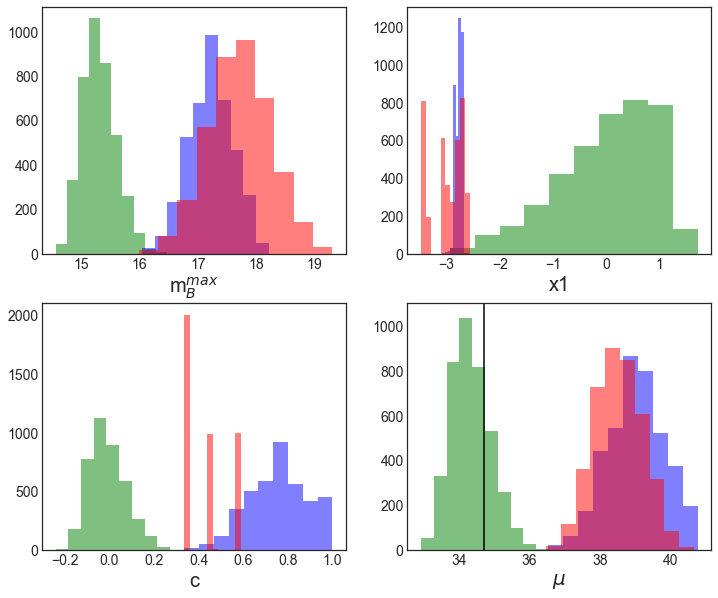

In [4]:
sim='ideal_z02'

M01=pd.read_table('model01_'+sim+'.FITRES.TEXT',header=6,delim_whitespace=True)
M41=pd.read_table('model41_'+sim+'.FITRES.TEXT',header=6,delim_whitespace=True)
M42=pd.read_table('model42_'+sim+'.FITRES.TEXT',header=6,delim_whitespace=True)
M01TOT=pd.read_table('model01_'+sim+'_z.txt',names='z')
M41TOT=pd.read_table('model41_'+sim+'_z.txt',names='z')
M42TOT=pd.read_table('model42_'+sim+'_z.txt',names='z')

fig, ax = pl.subplots(2,2,figsize=(12,10))#,sharex=True)

pl.sca(ax[0][0])
pl.hist(M01.mB,alpha=0.5,color='green')
pl.hist(M41.mB,alpha=0.5,color='blue')
pl.hist(M42.mB,alpha=0.5,color='red')
pl.xlabel(r'm$_B^{max}$',size=20)
pl.sca(ax[0][1])
pl.hist(M01.x1,alpha=0.5,color='green')
pl.hist(M41.x1,alpha=0.5,color='blue')
pl.hist(M42.x1,alpha=0.5,color='red')
pl.xlabel(r'x1',size=20)
pl.sca(ax[1][0])
pl.hist(M01.c,alpha=0.5,color='green')
pl.hist(M41.c,alpha=0.5,color='blue')
pl.hist(M42.c,alpha=0.5,color='red')
pl.xlabel(r'c',size=20)
pl.sca(ax[1][1])
mu_M01=M01.mB+19.05-0.14*M01.x1+3.1*M01.c
mu_M41=M41.mB+19.05-0.14*M41.x1+3.1*M41.c
mu_M42=M42.mB+19.05-0.14*M42.x1+3.1*M42.c
pl.hist(mu_M01,alpha=0.5,color='green')
pl.hist(mu_M41,alpha=0.5,color='blue')
pl.hist(mu_M42,alpha=0.5,color='red')
pl.plot([5*np.log10(d_lum_distri(0.02))+25,5*np.log10(d_lum_distri(0.02))+25],[0,1500],color='black')
pl.xlabel(r'$\mu$',size=20)
pl.ylim(0,1100)
pl.show()